# Water Quality Analysis in India

## Introduction
Water quality is a crucial concern in India, affecting millions of people. This dataset contains information about water contamination issues across various states, districts, and villages. The goal of this analysis is to:

- Identify the most common water quality issues  
- Find the states and districts most affected  
- Understand how water contamination has changed over the years  
- Visualize trends to gain insights for better water management  

In this project, we perform **data cleaning, exploratory data analysis (EDA), and visualizations** to interpret the dataset and derive meaningful conclusions.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting visualization style
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('IndiaAffectedWaterQualityAreas.csv', encoding="ISO-8859-1")

In [4]:
df.head(5)

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,1/4/2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,1/4/2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,1/4/2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,1/4/2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,1/4/2009


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550242 entries, 0 to 550241
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   State Name         550242 non-null  object
 1   District Name      550242 non-null  object
 2   Block Name         550242 non-null  object
 3   Panchayat Name     550242 non-null  object
 4   Village Name       550242 non-null  object
 5   Habitation Name    550242 non-null  object
 6   Quality Parameter  550242 non-null  object
 7   Year               550242 non-null  object
dtypes: object(8)
memory usage: 33.6+ MB


In [6]:
df.describe()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
count,550242,550242,550242,550242,550242,550242,550242,550242
unique,27,493,3577,37471,81703,147566,5,4
top,RAJASTHAN,BARMER,BALESAR,RATANPUR,RAMPUR,HARIJAN TOLA,Iron,1/4/2009
freq,131417,43752,8358,797,691,3072,302244,179999


In [7]:
df.shape

(550242, 8)

In [28]:
df.columns

Index(['State Name', 'District Name', 'Block Name', 'Panchayat Name',
       'Village Name', 'Habitation Name', 'Quality Parameter', 'Year'],
      dtype='object')

In [8]:
df.dtypes

State Name           object
District Name        object
Block Name           object
Panchayat Name       object
Village Name         object
Habitation Name      object
Quality Parameter    object
Year                 object
dtype: object

In [9]:
df.isnull().sum()

State Name           0
District Name        0
Block Name           0
Panchayat Name       0
Village Name         0
Habitation Name      0
Quality Parameter    0
Year                 0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(85)

In [11]:
df_cleaned = df.drop_duplicates()

In [12]:
# Checking Year column before conversion
df_cleaned['Year'] = df_cleaned['Year'].str.extract(r'(\d{4})').astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_19848\785247554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Year'].str.extract(r'(\d{4})').astype(int)


In [13]:
df_cleaned.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,2009


In [14]:
# Count unique values in categorical columns
categorical_columns = ['State Name', 'District Name', 'Quality Parameter']
for col in categorical_columns:
    print(f"\nUnique values in {col}: {df_cleaned[col].nunique()}")


Unique values in State Name: 27

Unique values in District Name: 493

Unique values in Quality Parameter: 5


In [15]:
## 5. Data Visualization

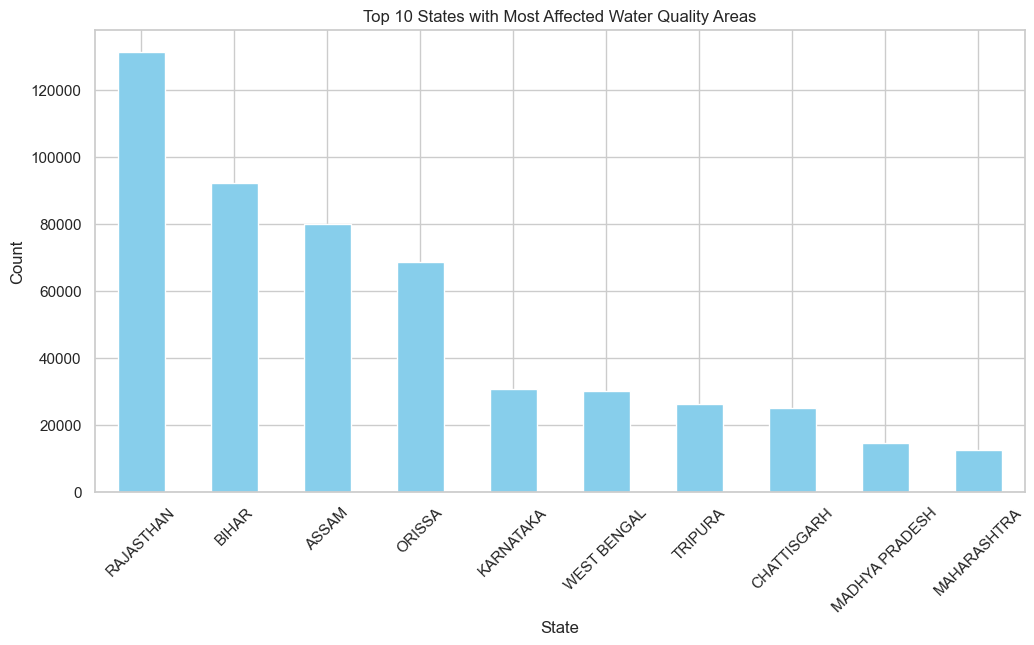

In [16]:
#1 Top 10 States with Most Affected Water Quality Areas
plt.figure(figsize=(12,6))
df_cleaned['State Name'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 States with Most Affected Water Quality Areas')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19848\3953742226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned['Quality Parameter'], order=df_cleaned['Quality Parameter'].value_counts().index, palette="coolwarm")


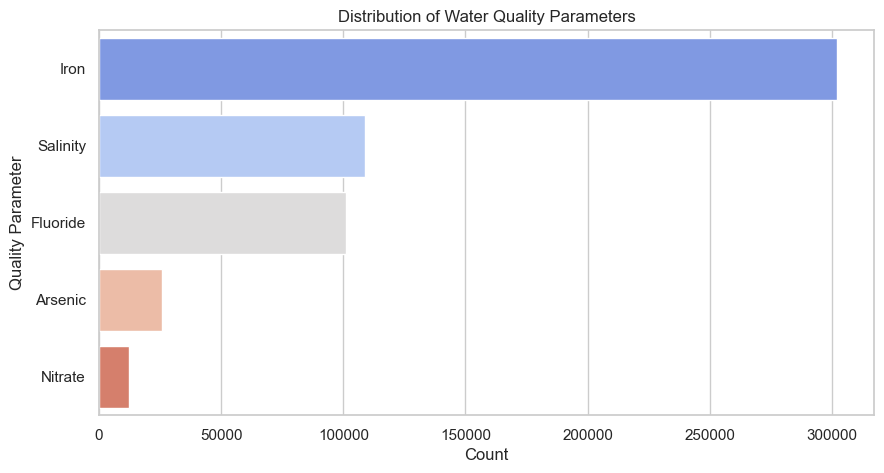

In [17]:
# 2 Distribution of Water Quality Parameters
plt.figure(figsize=(10,5))
sns.countplot(y=df_cleaned['Quality Parameter'], order=df_cleaned['Quality Parameter'].value_counts().index, palette="coolwarm")
plt.title('Distribution of Water Quality Parameters')
plt.xlabel('Count')
plt.ylabel('Quality Parameter')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19848\4108790120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned['Year'], palette='viridis')


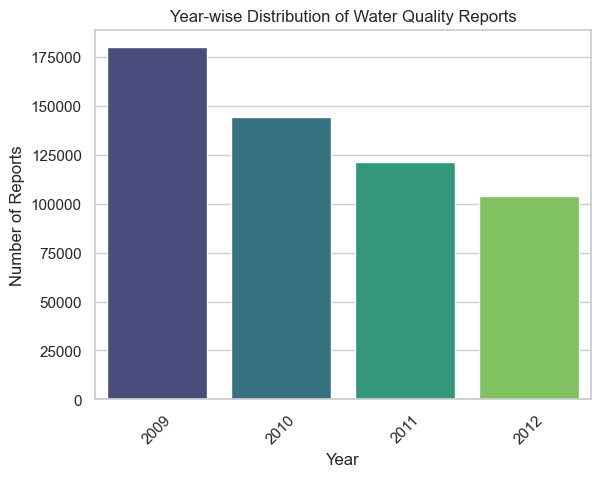

In [21]:
#3.Yearwise Distribution of Water Quality Report 
sns.countplot(x=df_cleaned['Year'], palette='viridis')
plt.title('Year-wise Distribution of Water Quality Reports')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.show()

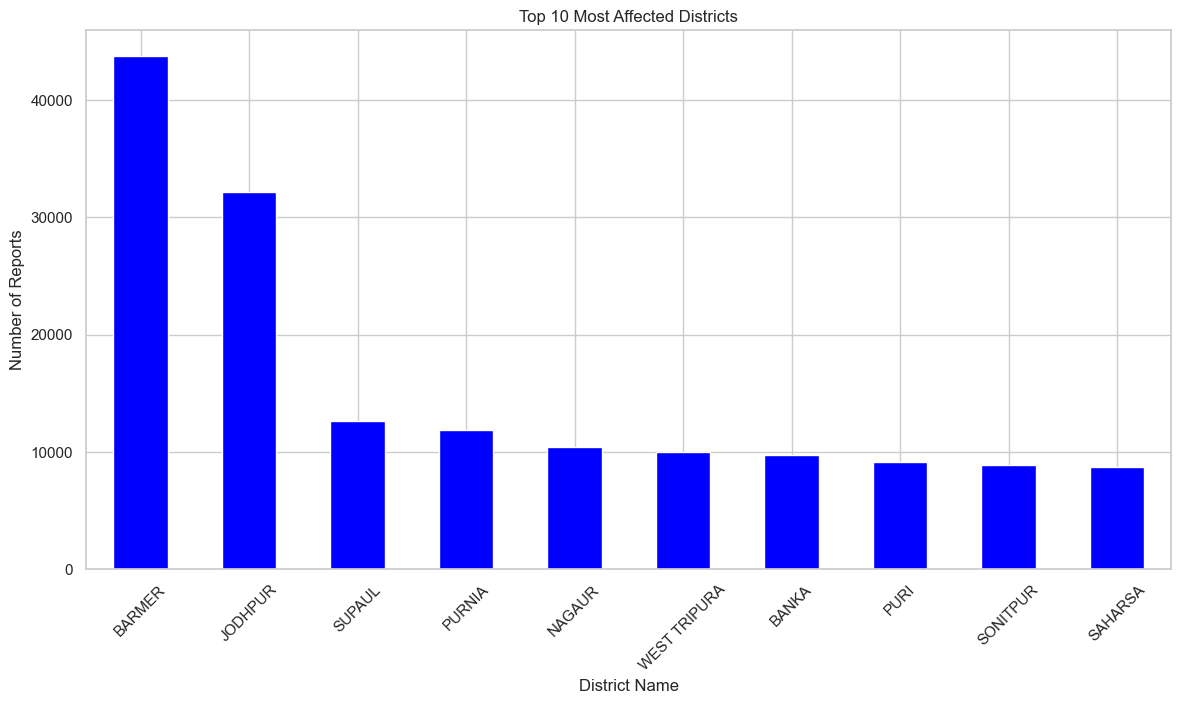

In [22]:
#4 This highlights which districts have the most water quality issues.
plt.figure(figsize=(14, 7))
df_cleaned['District Name'].value_counts().head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Most Affected Districts')
plt.xlabel('District Name')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.show()

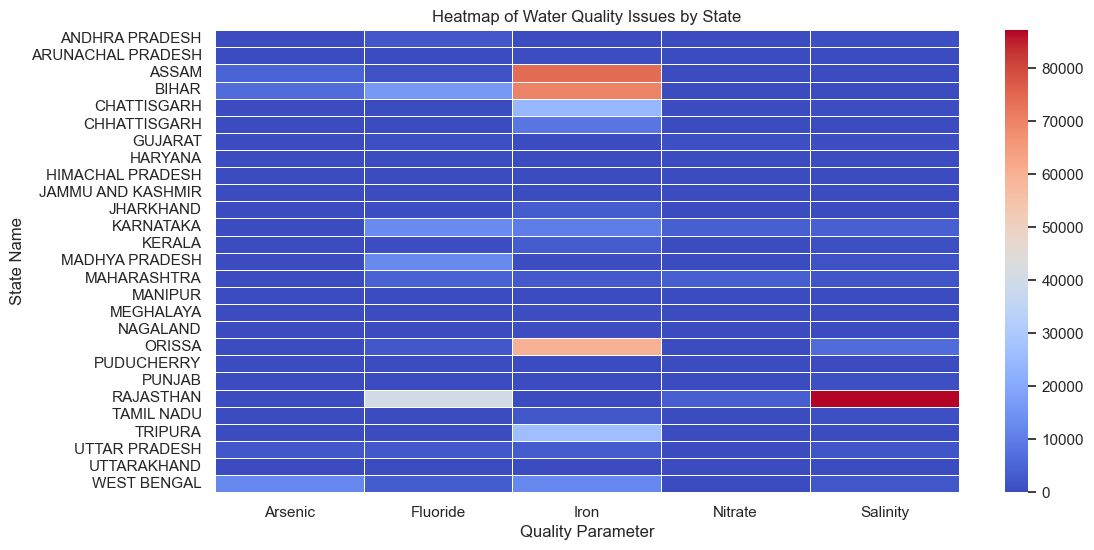

In [23]:
#5. Heatmap of State-wise Water Quality Reports
plt.figure(figsize=(12, 6))
state_quality = df_cleaned.groupby(['State Name', 'Quality Parameter']).size().unstack().fillna(0)
sns.heatmap(state_quality, cmap="coolwarm", linewidths=0.5)
plt.title('Heatmap of Water Quality Issues by State')
plt.xlabel('Quality Parameter')
plt.ylabel('State Name')
plt.show()

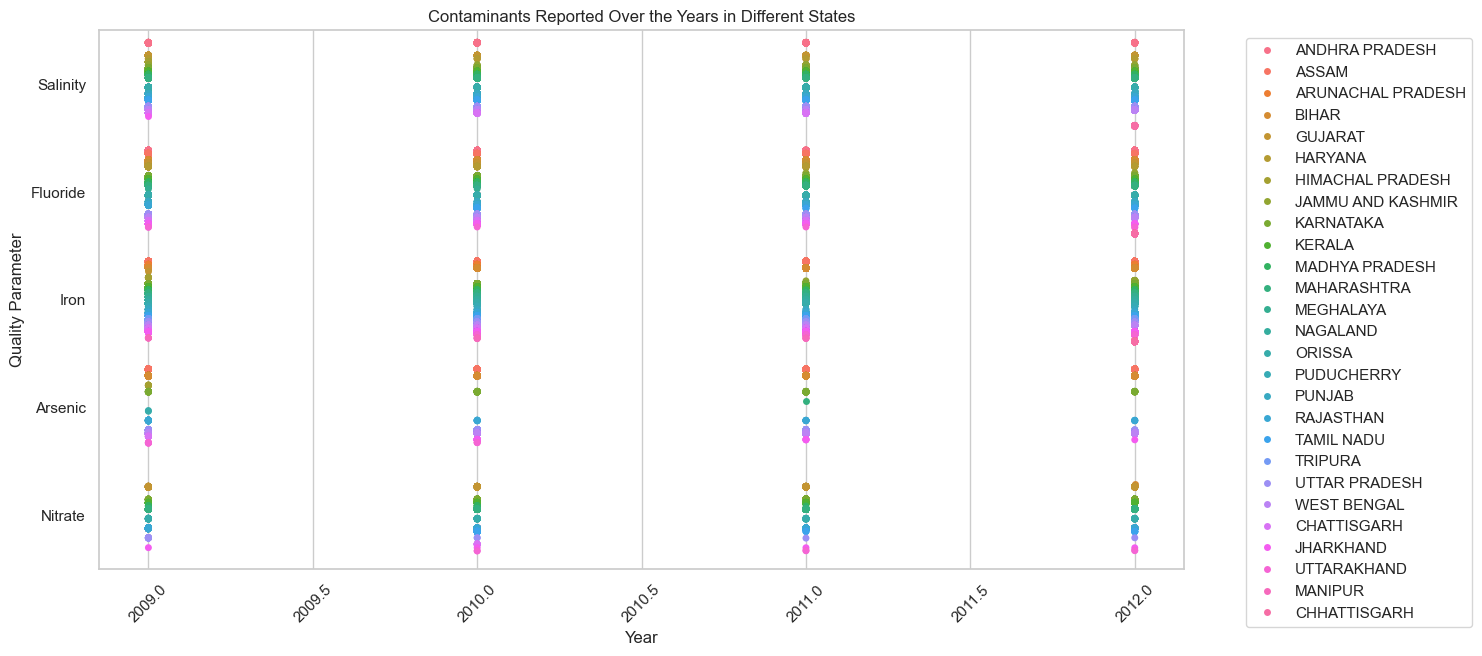

In [26]:
#6. Pie Chart of Quality Parameters
plt.figure(figsize=(14, 7))
sns.stripplot(data=df_cleaned, x="Year", y="Quality Parameter", hue="State Name", jitter=True, dodge=True)
plt.title("Contaminants Reported Over the Years in Different States")
plt.xlabel("Year")
plt.ylabel("Quality Parameter")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Summary & Key Insights  

The analysis of this dataset reveals significant insights into India's water quality concerns. Among the various contaminants, certain parameters such as **Iron,Salinity,Fluoride** appear most frequently, indicating widespread water pollution in different regions. The distribution of contamination is not uniform, as some states report a much higher number of cases than others. **Rajasthan,Bihar,Assam** are observed to have consistently high contamination reports, with certain districts being particularly vulnerable.

Over the years, the number of reported water quality issues has shown **increases**, with a noticeable peak in **2009**. This fluctuation may be attributed to various factors such as better reporting mechanisms, government interventions, or worsening environmental conditions. The heatmap visualization highlights regional hotspots where contamination levels are significantly high, reinforcing the need for urgent intervention.

The findings of this analysis emphasize the importance of **regular water quality monitoring and improved filtration systems** in affected areas. Raising awareness about water contamination risks and implementing preventive measures can help mitigate health hazards. Further studies on seasonal patterns of contamination and localized efforts to improve water safety could provide additional insights for sustainable water management.  